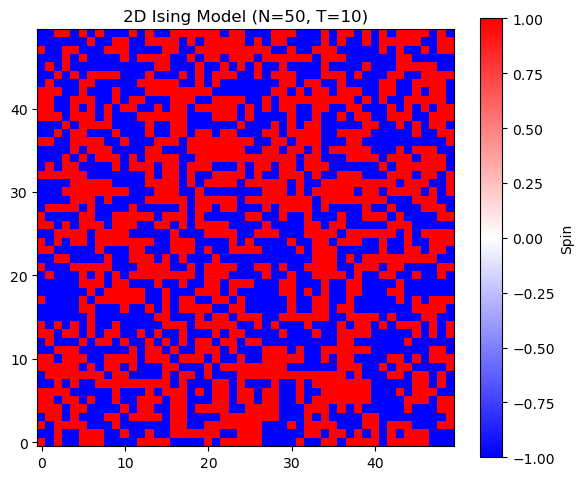

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def ising_metropolis(N, T, nsteps):
    """
    Simulate the 2D Ising model using the Metropolis algorithm.
    
    Parameters:
    -----------
    N      : int
        Linear dimension of the NxN lattice.
    T      : float
        Temperature (in dimensionless units, assuming k_B = 1 and J = 1).
    nsteps : int
        Number of Metropolis steps.
        
    Returns:
    --------
    S : 2D numpy array
        Final spin configuration on an NxN lattice (values are +1 or -1).
    """
    
    # Initialize spins randomly to +1 or -1
    S = 2 * np.random.randint(2, size=(N, N)) - 1

    for step in range(nsteps):
        # Pick a random lattice site
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        
        # Sum of spins of the four nearest neighbors (with periodic boundaries)
        nb = (S[(i+1) % N, j] + S[(i-1) % N, j] +
              S[i, (j+1) % N] + S[i, (j-1) % N])
        
        # Energy difference if we flip the spin at (i, j)
        dE = 2 * S[i, j] * nb
        
        # Metropolis acceptance condition
        if dE <= 0:
            # Always accept if energy is lower or equal
            S[i, j] = -S[i, j]
        else:
            # Accept with probability exp(-dE / T)
            if np.random.rand() < np.exp(-dE / T):
                S[i, j] = -S[i, j]
                
    return S

def main():
    # Parameters
    N = 50        # Lattice size (N x N)
    T = 10       # Temperature
    nsteps = 100000  # Number of Metropolis steps
    
    # Run simulation
    final_config = ising_metropolis(N, T, nsteps)
    
    # Plot final spin configuration
    plt.figure(figsize=(6, 5))
    plt.imshow(final_config, cmap='bwr', vmin=-1, vmax=1, origin='lower')
    plt.colorbar(label='Spin')
    plt.title(f'2D Ising Model (N={N}, T={T})')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
